In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [28]:
img = x_test[-1, :, :]
label = y_test[-1]
print(label)

6


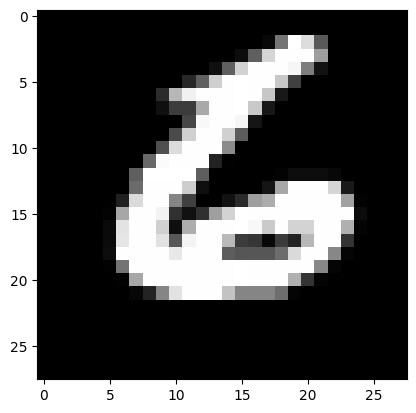

In [29]:
plt.imshow(img, cmap='gray')

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_train.shape[0]

60000

In [32]:
#casting to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [33]:
# add a third axis to the images : (60000, 28, 28) --> (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)

In [34]:
x_train.shape

(60000, 28, 28, 1)

#one-hot encoding
0 --> [1,0,0,0,0,0,0,0,0,0]
1 --> [0,1,0,0,0,0,0,0,0,0]
2 --> [0,0,1,0,0,0,0,0,0,0]
.
.
.
9 --> [0,0,0,0,0,0,0,0,0,1]

In [35]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [36]:
print('x_train reshaped', x_train.shape)
print('y_train reshaped', y_train_categorical.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test_categorical.shape)

x_train reshaped (60000, 28, 28, 1)
y_train reshaped (60000, 10)
x_test shape (10000, 28, 28)
y_test shape (10000, 10)


# data augmentation with data generator

In [37]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 10,
                                                                zoom_range = 0.05,
                                                                width_shift_range = 0.05,
                                                                height_shift_range = 0.05,
                                                                rescale = 1/255.,
                                                                validation_split = 0.2)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.,
                                                                validation_split = 0.2)

train_flow = train_datagen.flow(x_train,
                                y_train_categorical,
                                batch_size = 64,
                                seed = 3,
                                subset = 'training')

valid_flow = valid_datagen.flow(x_train,
                                y_train_categorical,
                                batch_size = 64,
                                seed = 3,
                                subset = 'validation')

# build the CNN

In [38]:
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
my_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Flatten())
my_model.add(tf.keras.layers.Dense(units=256, activation='relu'))
my_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layer

In [39]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [40]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])

In [41]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="auto")

In [42]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './logs/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

In [43]:
# fit without augmentations
history = my_model.fit(x=train_flow,
                        epochs=50,
                        verbose=1,
                       validation_data = valid_flow,
                       callbacks = [earlystop, model_checkpoint])

Epoch 1/50
750/750 [==============================] - 19s 23ms/step - loss: 0.1842 - accuracy: 0.9411 - val_loss: 0.0829 - val_accuracy: 0.9737
Epoch 2/50
750/750 [==============================] - 18s 24ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.0343 - val_accuracy: 0.9899
Epoch 3/50
750/750 [==============================] - 17s 23ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0390 - val_accuracy: 0.9877
Epoch 4/50
750/750 [==============================] - 18s 24ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 5/50
750/750 [==============================] - 18s 24ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0363 - val_accuracy: 0.9904
Epoch 6/50
750/750 [==============================] - 18s 24ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0263 - val_accuracy: 0.9918
Epoch 7/50
750/750 [==============================] - 18s 25ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0356 - val_accuracy:

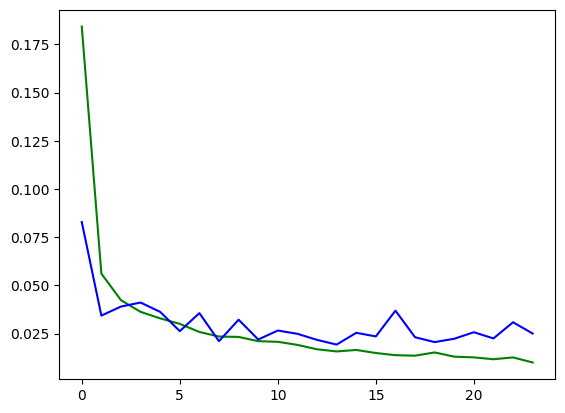

In [44]:
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='b')

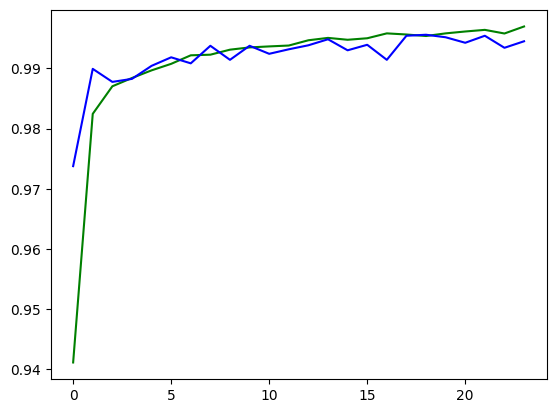

In [45]:
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color='b')

In [46]:
best_model = tf.keras.models.load_model('/content/logs/best_model.keras')

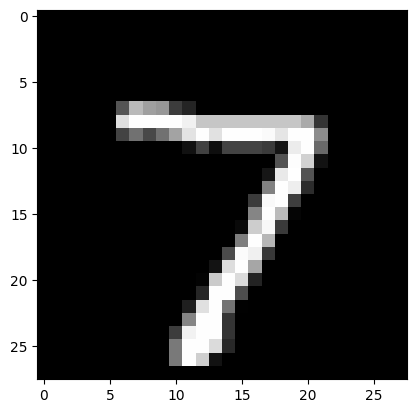

In [47]:
plt.imshow(x_test_norm[0], cmap='gray')

In [48]:
x_test_norm[0].shape

(28, 28)

In [ ]:
#(1, 28, 28, 1)

In [49]:
pred_img = np.expand_dims(x_test_norm[0], axis=-1)

In [50]:
pred_img = np.expand_dims(x_test[0], axis=-1)

In [51]:
pred_img.shape

(28, 28, 1)

In [52]:
pred_img = np.expand_dims(pred_img, axis=0)

In [53]:
pred_img.shape

(1, 28, 28, 1)

In [54]:
pred = best_model.predict(pred_img.astype('float32')/255)

1/1 [==============================] - 0s 358ms/step


In [55]:
print(pred[0])

[1.62344096e-12 1.36078668e-08 1.12915215e-08 1.75729972e-10
 1.83295157e-07 2.83177561e-13 4.00915348e-15 9.99999762e-01
 1.32232261e-08 1.10282921e-08]


In [56]:
print(np.argmax(pred[0]))

7


In [ ]:
y_test[0]

7

In [57]:
y_test_pred = []
for i in range(len(x_test)):
    img = x_test[i]
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    #img.shape = (1,28,28,1)
    pred = best_model.predict(img.astype('float32')/255)
    y_test_pred.append(np.argmax(pred[0]))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step


In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

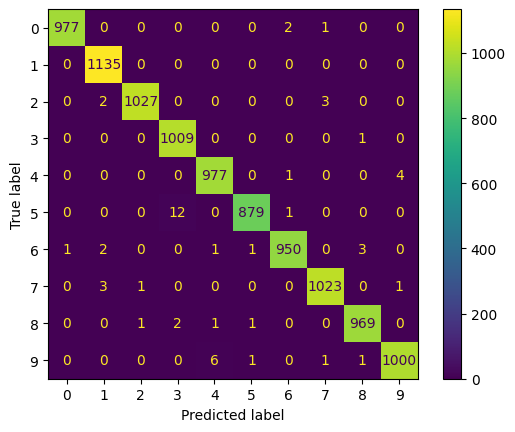

In [59]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(y_test, y_test_pred)*100)

99.46000000000001
